In [ ]:
# AutoGluon - Predicción de ventas (tn) por producto para febrero 2020

Instalación Autogluon

In [ ]:
%pip install autogluon.timeseries

In [ ]:
## 1. Importar librerías necesarias
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np




In [109]:
## 2. Cargar datasets
df_sellin = pd.read_csv("sell-in.txt", sep="\t")
df_productos = pd.read_csv("tb_productos.txt", sep="\t")

In [110]:
# Leer lista de productos a predecir
with open("product_id_apredecir201912.TXT", "r") as f:
    product_ids = [int(line.strip()) for line in f if line.strip().isdigit()]

In [111]:
## 3. Preprocesamiento
# Convertir periodo a datetime
df_sellin['timestamp'] = pd.to_datetime(df_sellin['periodo'], format='%Y%m')

In [112]:
# Filtrar h productos requeridos
df_filtered = df_sellin[
    (df_sellin['product_id'].isin(product_ids))
]

In [113]:
# Agregar tn por periodo, cliente y producto
df_grouped = df_filtered.groupby(['timestamp', 'customer_id', 'product_id'], as_index=False)['tn'].sum()

In [114]:


# Paso 2: Crear un DataFrame con ventas de diciembre 2019 por producto
ventas_dic_2019 = df_grouped[df_grouped['timestamp'] == pd.to_datetime('2019-12-01')]
ventas_dic_2019 = ventas_dic_2019.groupby('product_id')['tn'].sum().reset_index()
ventas_dic_2019.columns = ['product_id', 'tn_dic_2019']
#print("Ventas de diciembre 2019 por producto:", ventas_dic_2019[ventas_dic_2019['product_id'] == 20010])


Ventas de diciembre 2019 por producto:    product_id  tn_dic_2019
9       20010    359.59998


In [115]:
# Agregar tn total por periodo y producto
df_monthly_product = df_grouped.groupby(['timestamp', 'product_id'], as_index=False)['tn'].sum()
#print("Ventas de diciembre 2019 por producto:", df_monthly_product[df_monthly_product['product_id'] == 20010])

Ventas de diciembre 2019 por producto:        timestamp  product_id          tn
9     2017-01-01       20010   441.25546
505   2017-02-01       20010   562.98287
1003  2017-03-01       20010   718.44870
1504  2017-04-01       20010   607.72864
2004  2017-05-01       20010   759.99707
2510  2017-06-01       20010  1032.41184
3023  2017-07-01       20010   573.89415
3546  2017-08-01       20010   651.39113
4075  2017-09-01       20010   940.83230
4610  2017-10-01       20010  1212.23362
5159  2017-11-01       20010   747.14647
5723  2017-12-01       20010   507.57042
6287  2018-01-01       20010   298.25586
6853  2018-02-01       20010   477.48363
7421  2018-03-01       20010   653.77607
7996  2018-04-01       20010   171.74107
8583  2018-05-01       20010   227.24082
9182  2018-06-01       20010   223.87746
9780  2018-07-01       20010   331.96807
10383 2018-08-01       20010   582.83104
10989 2018-09-01       20010   480.60235
11616 2018-10-01       20010   612.50721
12261 2018-11-01  

Crear el dataframe para correr en AutoGluon

In [116]:
# Agregar columna 'item_id' para AutoGluon
df_monthly_product['item_id'] = df_monthly_product['product_id']

In [117]:
## 4. Crear TimeSeriesDataFrame
ts_data = TimeSeriesDataFrame.from_data_frame(
    df_monthly_product,
    id_column='item_id',
    timestamp_column='timestamp'
)

In [118]:
print(ts_data.loc[20010])

            product_id          tn
timestamp                         
2017-01-01       20010   441.25546
2017-02-01       20010   562.98287
2017-03-01       20010   718.44870
2017-04-01       20010   607.72864
2017-05-01       20010   759.99707
2017-06-01       20010  1032.41184
2017-07-01       20010   573.89415
2017-08-01       20010   651.39113
2017-09-01       20010   940.83230
2017-10-01       20010  1212.23362
2017-11-01       20010   747.14647
2017-12-01       20010   507.57042
2018-01-01       20010   298.25586
2018-02-01       20010   477.48363
2018-03-01       20010   653.77607
2018-04-01       20010   171.74107
2018-05-01       20010   227.24082
2018-06-01       20010   223.87746
2018-07-01       20010   331.96807
2018-08-01       20010   582.83104
2018-09-01       20010   480.60235
2018-10-01       20010   612.50721
2018-11-01       20010   414.97753
2018-12-01       20010   285.02947
2019-01-01       20010   370.75591
2019-02-01       20010   337.76009
2019-03-01       200

In [120]:
# Completar valores faltantes
ts_data = ts_data.fill_missing_values()
print(ts_data.loc[20010])

            product_id          tn
timestamp                         
2017-01-01       20010   441.25546
2017-02-01       20010   562.98287
2017-03-01       20010   718.44870
2017-04-01       20010   607.72864
2017-05-01       20010   759.99707
2017-06-01       20010  1032.41184
2017-07-01       20010   573.89415
2017-08-01       20010   651.39113
2017-09-01       20010   940.83230
2017-10-01       20010  1212.23362
2017-11-01       20010   747.14647
2017-12-01       20010   507.57042
2018-01-01       20010   298.25586
2018-02-01       20010   477.48363
2018-03-01       20010   653.77607
2018-04-01       20010   171.74107
2018-05-01       20010   227.24082
2018-06-01       20010   223.87746
2018-07-01       20010   331.96807
2018-08-01       20010   582.83104
2018-09-01       20010   480.60235
2018-10-01       20010   612.50721
2018-11-01       20010   414.97753
2018-12-01       20010   285.02947
2019-01-01       20010   370.75591
2019-02-01       20010   337.76009
2019-03-01       200

Definir fecha de corte y armado de DF hasta Octubre 2019 para predecir diciembre

In [123]:
cutoff_date = pd.to_datetime("2019-10-01")

In [125]:

# --- Separar train hasta octubre 2019 ---
train_data = ts_data[ts_data.index.get_level_values("timestamp") <= cutoff_date]
print(train_data.loc[20010])

            product_id          tn
timestamp                         
2017-01-01       20010   441.25546
2017-02-01       20010   562.98287
2017-03-01       20010   718.44870
2017-04-01       20010   607.72864
2017-05-01       20010   759.99707
2017-06-01       20010  1032.41184
2017-07-01       20010   573.89415
2017-08-01       20010   651.39113
2017-09-01       20010   940.83230
2017-10-01       20010  1212.23362
2017-11-01       20010   747.14647
2017-12-01       20010   507.57042
2018-01-01       20010   298.25586
2018-02-01       20010   477.48363
2018-03-01       20010   653.77607
2018-04-01       20010   171.74107
2018-05-01       20010   227.24082
2018-06-01       20010   223.87746
2018-07-01       20010   331.96807
2018-08-01       20010   582.83104
2018-09-01       20010   480.60235
2018-10-01       20010   612.50721
2018-11-01       20010   414.97753
2018-12-01       20010   285.02947
2019-01-01       20010   370.75591
2019-02-01       20010   337.76009
2019-03-01       200

Entrenamiento para predecir diciembre 2019

In [126]:

# --- Predicción para diciembre 2019 (prediction_length = 2 desde octubre) ---
predictor = TimeSeriesPredictor(
    prediction_length=2,
    target="tn",
    freq="MS",
    path="model_hasta_octubre/"
)


In [127]:

predictor.fit(train_data)

Beginning AutoGluon training...
AutoGluon will save models to '/Users/patricialorenasarmientotagle/austral-labo-iii/notebooks/model_hasta_octubre'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.5.0: Tue Apr 22 19:53:27 PDT 2025; root:xnu-11417.121.6~2/RELEASE_ARM64_T6041
CPU Count:          12
GPU Count:          0
Memory Avail:       5.96 GB / 24.00 GB (24.9%)
Disk Space Avail:   272.77 GB / 460.43 GB (59.2%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'MS',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 2,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'tn',
 'verbosity': 2}

train_data with frequency 'I

Analisis de resultados

In [162]:
# Mostrar el leaderboard de modelos evaluados por AutoGluon
leaderboard = predictor.leaderboard()
print(leaderboard)

                           model  score_val  pred_time_val  fit_time_marginal  \
0               WeightedEnsemble  -0.160735       8.745138           0.591697   
1                       PatchTST  -0.173615       0.098348          16.507186   
2      TemporalFusionTransformer  -0.177816       0.212578         116.783578   
3     ChronosZeroShot[bolt_base]  -0.178081       3.487572           0.013906   
4   ChronosFineTuned[bolt_small]  -0.184257       0.323934         130.873436   
5                         DeepAR  -0.187870       0.287674          30.143254   
6          DynamicOptimizedTheta  -0.193459       2.106251           0.015489   
7                        AutoETS  -0.193673       0.959310           0.014993   
8                  SeasonalNaive  -0.217525       3.850058           0.017205   
9               RecursiveTabular  -0.230037       0.019997           0.957940   
10                          TiDE  -0.249265       0.231974          41.639408   
11                 DirectTab

In [165]:

# Obtener nombres de modelos desde el leaderboard
modelos = predictor.leaderboard(silent=True)['model'].tolist()
rmse_por_modelo = []

# Iterar y calcular RMSE por modelo
for modelo in modelos:
    # Predecir usando el modelo específico
    y_pred = predictor.predict(train_data, model=modelo)
    # Extraer solo la predicción de diciembre 2019 (igual que forecast_diciembre)
    y_pred_dic = y_pred['mean'].loc[:, pd.to_datetime("2019-12-01")]
    # Alinear con los valores reales
    y_true_dic = ventas_dic_2019.set_index('product_id').loc[y_pred_dic.index, 'tn_dic_2019']
    # Calcular RMSE
    rmse = mean_squared_error(y_true_dic, y_pred_dic, squared=False)
    rmse_por_modelo.append({"model": modelo, "rmse_val": rmse})

# Mostrar como DataFrame
import pandas as pd
df_rmse = pd.DataFrame(rmse_por_modelo).sort_values("rmse_val")
print(df_rmse)


data with frequency 'IRREG' has been resampled to frequency 'MS'.
/Users/patricialorenasarmientotagle/Env/AST/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
data with frequency 'IRREG' has been resampled to frequency 'MS'.
/Users/patricialorenasarmientotagle/Env/AST/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
data with frequency 'IRREG' has been resampled to frequency 'MS'.
/Users/patricialorenasarmientotagle/Env/AST/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean s

                           model   rmse_val
4   ChronosFineTuned[bolt_small]  19.220842
5                         DeepAR  20.153447
2      TemporalFusionTransformer  21.186087
11                 DirectTabular  22.116989
0               WeightedEnsemble  23.758247
3     ChronosZeroShot[bolt_base]  24.044531
10                          TiDE  24.964843
8                  SeasonalNaive  24.981586
1                       PatchTST  29.373610
12                          NPTS  31.519126
6          DynamicOptimizedTheta  33.560820
7                        AutoETS  33.881195
9               RecursiveTabular  35.338866


/Users/patricialorenasarmientotagle/Env/AST/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [129]:
import pandas as pd

# Mostrar los modelos ordenados por la métrica utilizada (por defecto: -WQL)
leaderboard = predictor.leaderboard(silent=True)
leaderboard_sorted = leaderboard.sort_values(by='score_val', ascending=False)
display(leaderboard_sorted[['model', 'score_val', 'fit_time_marginal', 'pred_time_val']])

,model,score_val,fit_time_marginal,pred_time_val
0,WeightedEnsemble,-0.160735,0.591697,8.745138
1,PatchTST,-0.173615,16.507186,0.098348
2,TemporalFusionTransformer,-0.177816,116.783578,0.212578
3,ChronosZeroShot[bolt_base],-0.178081,0.013906,3.487572
4,ChronosFineTuned[bolt_small],-0.184257,130.873436,0.323934
5,DeepAR,-0.187870,30.143254,0.287674
6,DynamicOptimizedTheta,-0.193459,0.015489,2.106251
7,AutoETS,-0.193673,0.014993,0.959310
8,SeasonalNaive,-0.217525,0.017205,3.850058
9,RecursiveTabular,-0.230037,0.957940,0.019997


Prediccion de Diciembre 2019

In [130]:
# --- Predecir desde octubre para alcanzar diciembre ---
forecast = predictor.predict(train_data)


data with frequency 'IRREG' has been resampled to frequency 'MS'.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


In [131]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE entre la predicción y el valor real de diciembre 2019
rmse = np.sqrt(mean_squared_error(comparacion_diciembre["tn_dic_2019"], comparacion_diciembre["tn"]))
print(f"RMSE diciembre 2019: {rmse:.5f}")

RMSE diciembre 2019: 27.90230


Comprobación con un artîculo 

In [132]:
# Imprimir la predicción de ventas para diciembre 2019 para el artículo 20010
pred_20010 = forecast.reset_index()
pred_20010_dic = pred_20010[(pred_20010["item_id"] == 20010) & (pred_20010["timestamp"] == pd.to_datetime("2019-12-01"))]
print(pred_20010_dic[["item_id", "timestamp", "mean"]])

    item_id  timestamp        mean
19    20010 2019-12-01  389.954611


In [137]:
# Tomar solo item_id y la predicción 'mean'
resultado = forecast['mean'].reset_index()[['item_id', 'mean']]
resultado.columns = ['product_id', 'tn']

# Guardar a CSV
resultado.to_csv("predicciones_dic2019.csv", index=False)
resultado[resultado['product_id'] == 20010]


,product_id,tn
18,20010,452.313107
19,20010,389.954611


Comparación de predicción de diciembre con ventas reales 

In [135]:
# Hacer la comparación
comparacion_diciembre = pd.merge(resultado, ventas_dic_2019, on="product_id", how="inner")

# Guardar salida
output_comparacion = "comparacion_pred_vs_real_dic2019.csv"
comparacion_diciembre.to_csv(output_comparacion, index=False)


In [138]:
# Extraer solo las predicciones para el 1 de diciembre de 2019
forecast_diciembre = forecast['mean'].loc[:, pd.to_datetime("2019-12-01")]

# Convertir a DataFrame plano
resultado_diciembre = forecast_diciembre.reset_index()[['item_id', 'mean']]
resultado_diciembre.columns = ['product_id', 'tn']

# Verificar resultados
resultado_diciembre.head()

,product_id,tn
0,20001,1481.787854
1,20002,1249.932103
2,20003,954.479523
3,20004,806.569706
4,20005,743.411579


In [139]:
resultado_diciembre.to_csv("predicciones_dic2019_solo.csv", index=False)

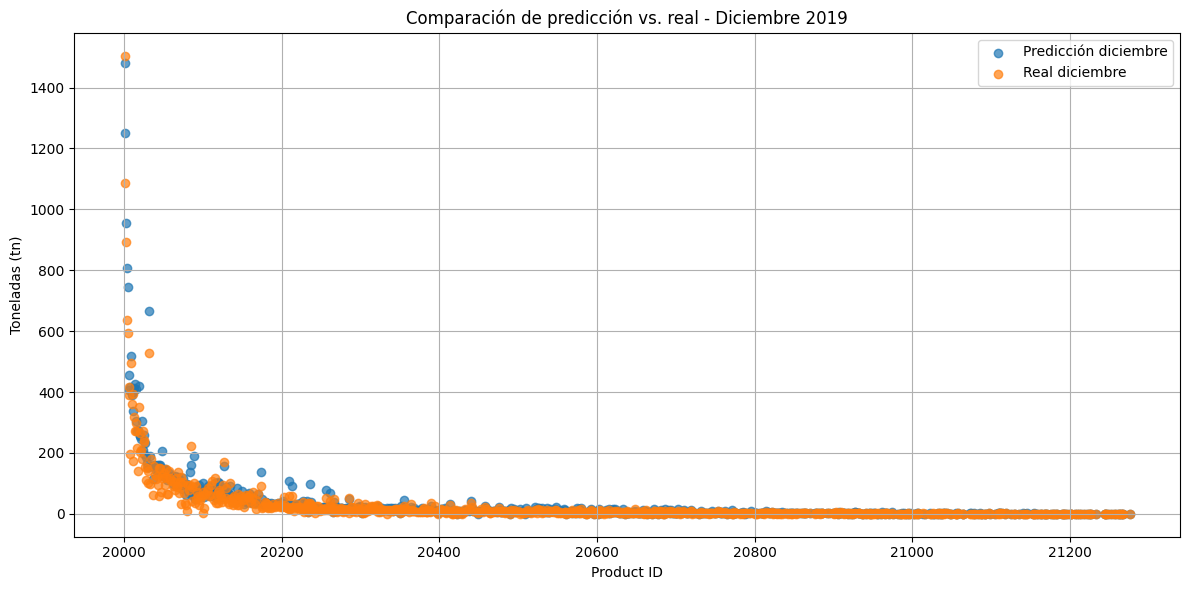

In [142]:
import matplotlib.pyplot as plt

# Volver a cargar el CSV combinado si no está en memoria
comparacion_diciembre_path = "predicciones_dic2019_solo.csv"
comparacion_diciembre = pd.read_csv(comparacion_diciembre_path)

# Unir con los valores reales de diciembre 2019
comparacion_diciembre = comparacion_diciembre.merge(ventas_dic_2019, on="product_id", how="left")

comparacion_diciembre = comparacion_diciembre.rename(columns={"tn": "tn", "tn_dic_2019": "tn_dic_2019"})
comparacion_diciembre.to_csv("comparacion_diciembre.csv", index=False)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(comparacion_diciembre["product_id"], comparacion_diciembre["tn"], label="Predicción diciembre", alpha=0.7)
plt.scatter(comparacion_diciembre["product_id"], comparacion_diciembre["tn_dic_2019"], label="Real diciembre", alpha=0.7)
plt.xlabel("Product ID")
plt.ylabel("Toneladas (tn)")
plt.title("Comparación de predicción vs. real - Diciembre 2019")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


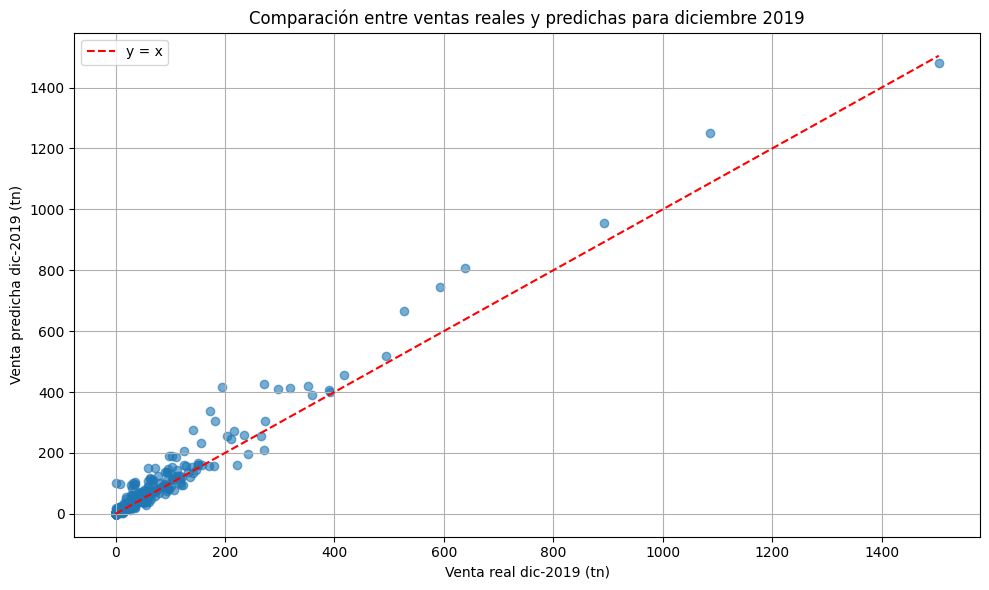

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de comparación
comparacion_diciembre = pd.read_csv("comparacion_diciembre.csv")

# Crear gráfico tipo scatter con línea de referencia y = x
plt.figure(figsize=(10, 6))

# Puntos reales vs predichos
plt.scatter(comparacion_diciembre["tn_dic_2019"], comparacion_diciembre["tn"], alpha=0.6)

# Línea ideal y = x
max_val = max(comparacion_diciembre["tn_dic_2019"].max(), comparacion_diciembre["tn"].max())
plt.plot([0, max_val], [0, max_val], 'r--', label="y = x")

# Etiquetas y detalles
plt.xlabel("Venta real dic-2019 (tn)")
plt.ylabel("Venta predicha dic-2019 (tn)")
plt.title("Comparación entre ventas reales y predichas para diciembre 2019")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Archivo exportado: comparacion_diciembre_con_errores.csv


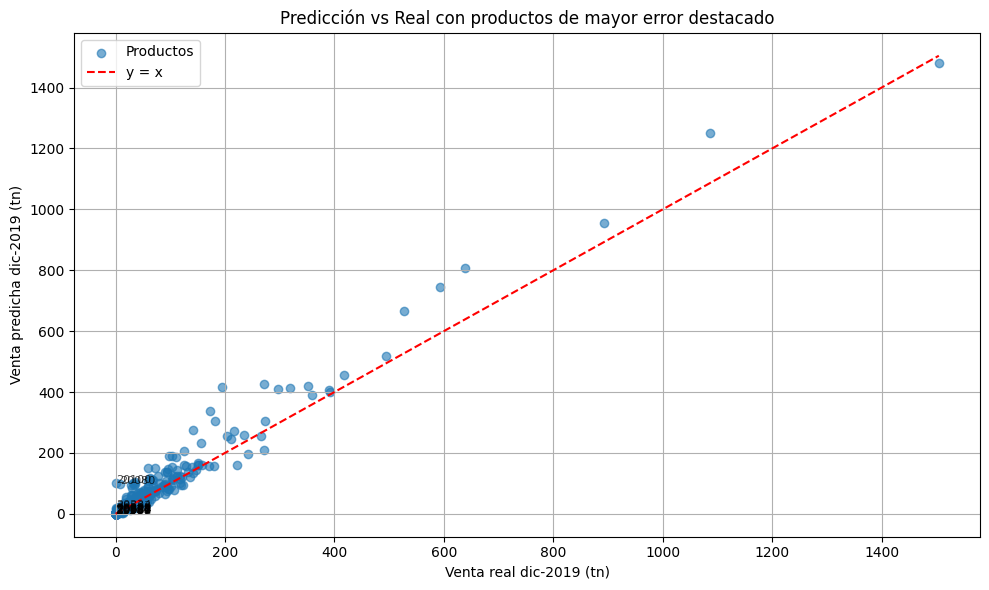

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar la comparación
df = pd.read_csv("comparacion_diciembre.csv")

# Calcular errores
df["error_abs"] = (df["tn"] - df["tn_dic_2019"]).abs()
df["error_pct"] = df.apply(
    lambda row: abs(row["tn"] - row["tn_dic_2019"]) / row["tn_dic_2019"] * 100 if row["tn_dic_2019"] != 0 else None,
    axis=1
)

# Ordenar por mayor error porcentual
df_top_errores = df.sort_values(by="error_pct", ascending=False).head(20)

# Guardar comparación extendida
df.to_csv("comparacion_diciembre_con_errores.csv", index=False)
print("✅ Archivo exportado: comparacion_diciembre_con_errores.csv")

# Gráfico scatter con línea y = x
plt.figure(figsize=(10, 6))
plt.scatter(df["tn_dic_2019"], df["tn"], alpha=0.6, label="Productos")
plt.plot([0, df[["tn", "tn_dic_2019"]].max().max()], [0, df[["tn", "tn_dic_2019"]].max().max()], 'r--', label="y = x")

# Opcional: anotar los puntos con mayor error
for _, row in df_top_errores.iterrows():
    plt.annotate(str(int(row["product_id"])), (row["tn_dic_2019"], row["tn"]), fontsize=8, alpha=0.7)

plt.xlabel("Venta real dic-2019 (tn)")
plt.ylabel("Venta predicha dic-2019 (tn)")
plt.title("Predicción vs Real con productos de mayor error destacado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [146]:
# Asegurate de tener la columna de error absoluto
df = pd.read_csv("comparacion_diciembre_con_errores.csv")
df["error_abs"] = (df["tn"] - df["tn_dic_2019"]).abs()

# Ordenar por error absoluto descendente
df_sorted = df.sort_values(by="error_abs", ascending=False)

# Calcular error acumulado y porcentaje del total
total_error = df_sorted["error_abs"].sum()
df_sorted["error_acumulado"] = df_sorted["error_abs"].cumsum()
df_sorted["porc_acumulado"] = df_sorted["error_acumulado"] / total_error

# Seleccionar productos que explican el 80% del desvío
df_pareto_80 = df_sorted[df_sorted["porc_acumulado"] <= 0.80]

# Calcular qué % del total de productos representan
total_productos = df_sorted.shape[0]
productos_80 = df_pareto_80.shape[0]
porcentaje_productos = productos_80 / total_productos * 100

print(f"✅ {productos_80} productos ({porcentaje_productos:.2f}%) generan el 80% del error total.")

# Exportar a CSV si querés
df_pareto_80.to_csv("productos_80_error.csv", index=False)


✅ 150 productos (19.23%) generan el 80% del error total.


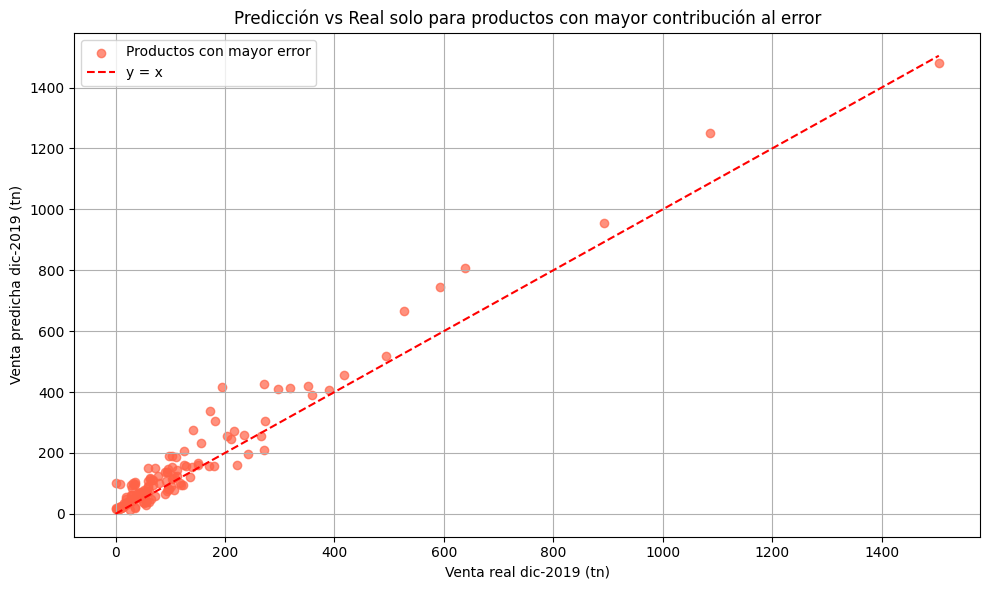

In [148]:
# Cargar el archivo con errores si aún no está cargado
df = pd.read_csv("comparacion_diciembre.csv")
df["error_abs"] = abs(df["tn"] - df["tn_dic_2019"])

# Ordenar y calcular error acumulado
df_sorted = df.sort_values(by="error_abs", ascending=False).reset_index(drop=True)
total_error = df_sorted["error_abs"].sum()
df_sorted["error_acumulado"] = df_sorted["error_abs"].cumsum()
df_sorted["porc_error_acumulado"] = df_sorted["error_acumulado"] / total_error

# Filtrar productos que generan el 80% del error
df_top_errores = df_sorted[df_sorted["porc_error_acumulado"] <= 0.80]

# Graficar solo esos productos
plt.figure(figsize=(10, 6))
plt.scatter(df_top_errores["tn_dic_2019"], df_top_errores["tn"], color='tomato', alpha=0.7, label="Productos con mayor error")
plt.plot([0, max(df["tn_dic_2019"].max(), df["tn"].max())],
         [0, max(df["tn_dic_2019"].max(), df["tn"].max())],
         'r--', label="y = x")

plt.xlabel("Venta real dic-2019 (tn)")
plt.ylabel("Venta predicha dic-2019 (tn)")
plt.title("Predicción vs Real solo para productos con mayor contribución al error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


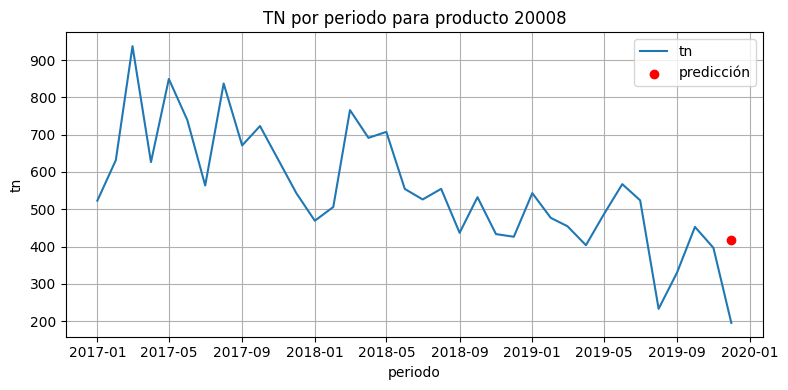

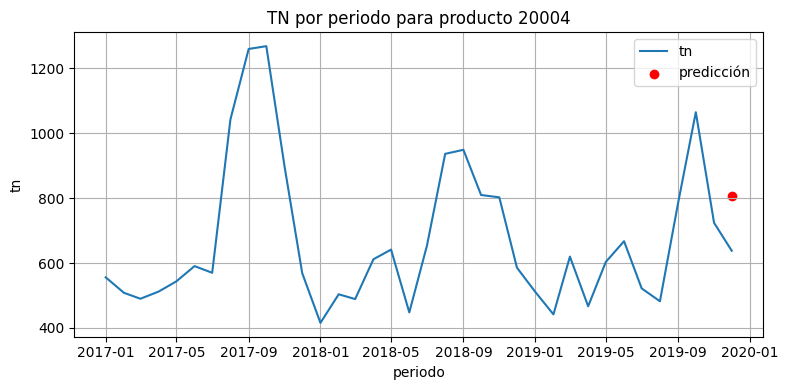

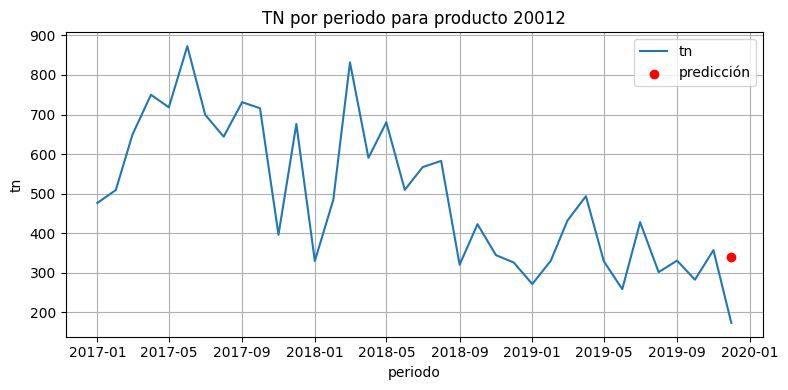

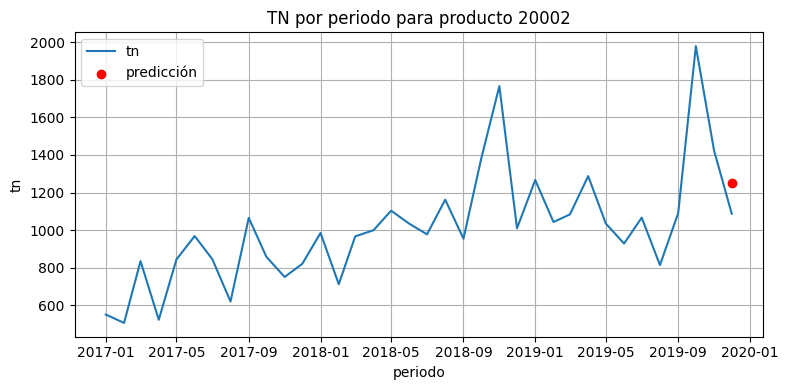

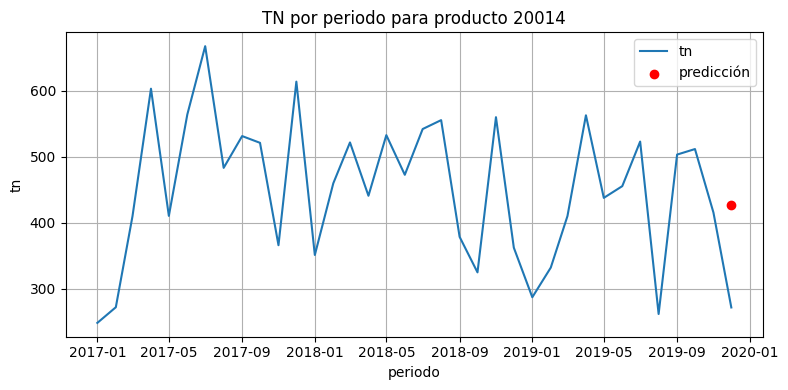

In [158]:
# Reimportar librerías tras el reset
import pandas as pd
import matplotlib.pyplot as plt

# Vuelvo a cargar los archivos necesarios
df_ventas = pd.read_csv("comparacion_diciembre.csv")
df_ventas["error_abs"] = abs(df_ventas["tn"] - df_ventas["tn_dic_2019"])

df_sellin = pd.read_csv("sell-in.txt", sep="\t")
df_sellin["periodo"] = pd.to_datetime(df_sellin["periodo"], format="%Y%m")

# Seleccionar productos que generan el 80% del error acumulado
df_sorted = df_ventas.sort_values(by="error_abs", ascending=False).reset_index(drop=True)
total_error = df_sorted["error_abs"].sum()
df_sorted["error_acumulado"] = df_sorted["error_abs"].cumsum()
df_sorted["porc_error_acumulado"] = df_sorted["error_acumulado"] / total_error
productos_top_error = df_sorted[df_sorted["porc_error_acumulado"] <= 0.80]["product_id"].unique()

# Graficar solo los primeros 5 para muestra
graficos_generados = []

for product_id in productos_top_error[:5]:
    df_producto = df_sellin[df_sellin["product_id"] == product_id]
    serie = df_producto.groupby("periodo")["tn"].sum().sort_index()

    # Obtener predicción
    pred_row = df_ventas[df_ventas["product_id"] == product_id]
    pred = pred_row["tn"].values[0] if not pred_row.empty else None

    # Crear gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(serie.index, serie.values, label="tn")
    if pred is not None:
        plt.scatter(pd.to_datetime("2019-12-01"), pred, color='red', label="predicción")
    plt.title(f"TN por periodo para producto {product_id}")
    plt.xlabel("periodo")
    plt.ylabel("tn")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


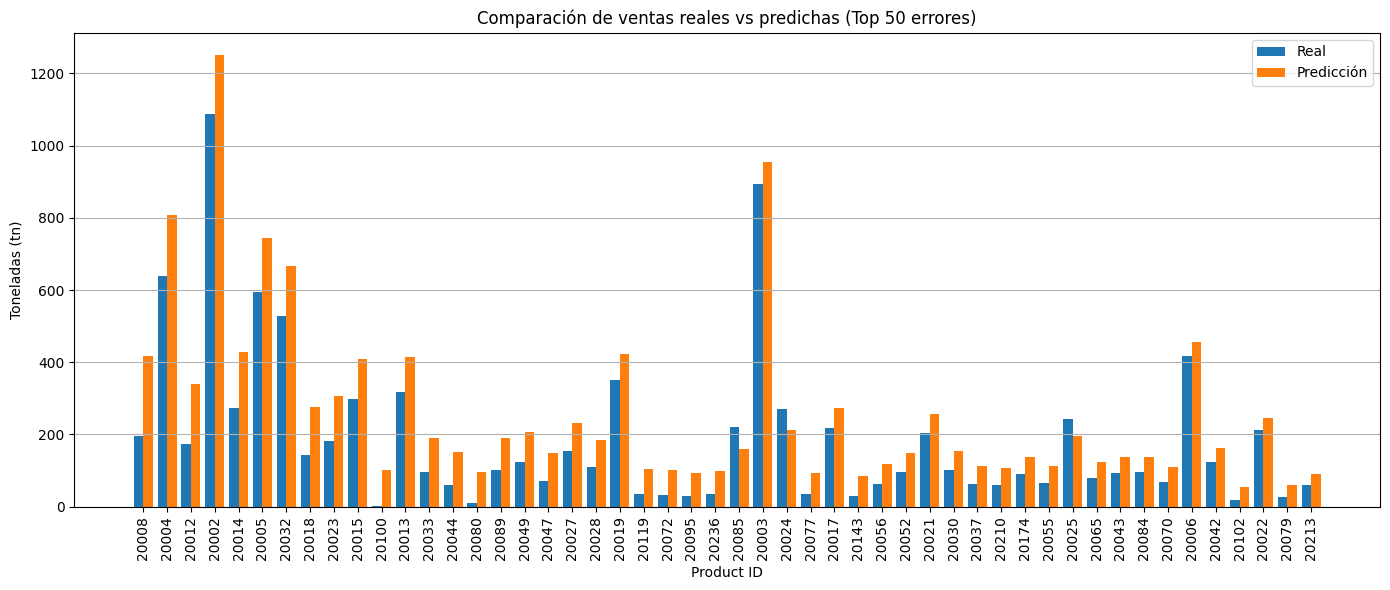

In [166]:


# Cargar archivo con comparación predicción vs real
df = pd.read_csv("comparacion_diciembre.csv")

# Calcular error absoluto y ordenar
df["error_abs"] = abs(df["tn"] - df["tn_dic_2019"])
df_top50 = df.sort_values(by="error_abs", ascending=False).head(50)

# Crear gráfico de barras agrupadas
plt.figure(figsize=(14, 6))
x = range(len(df_top50))
bar_width = 0.4

plt.bar(x, df_top50["tn_dic_2019"], width=bar_width, label="Real", align="center")
plt.bar([i + bar_width for i in x], df_top50["tn"], width=bar_width, label="Predicción", align="center")

plt.xticks([i + bar_width / 2 for i in x], df_top50["product_id"], rotation=90)
plt.xlabel("Product ID")
plt.ylabel("Toneladas (tn)")
plt.title("Comparación de ventas reales vs predichas (Top 50 errores)")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


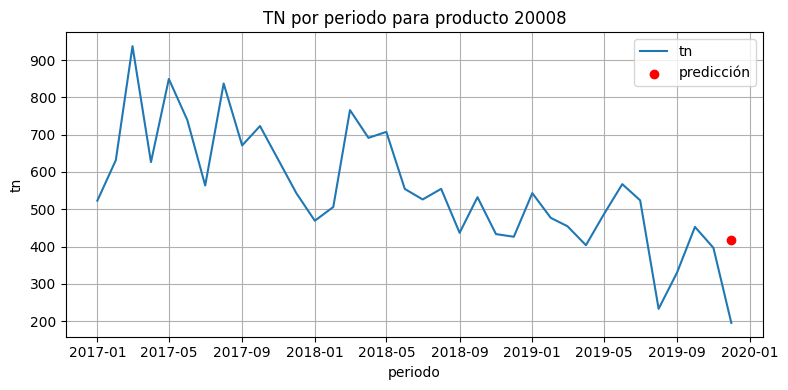

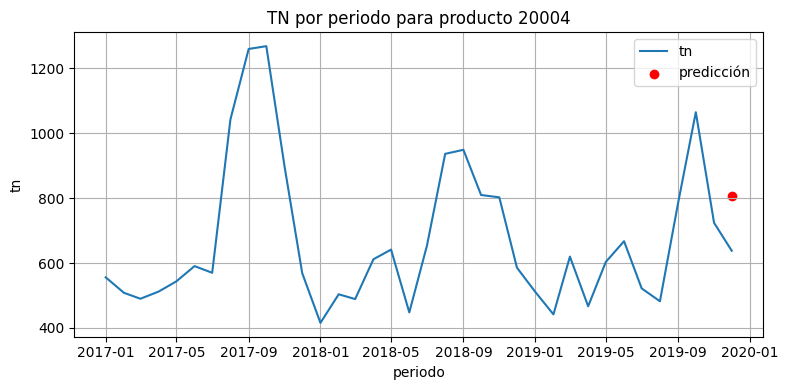

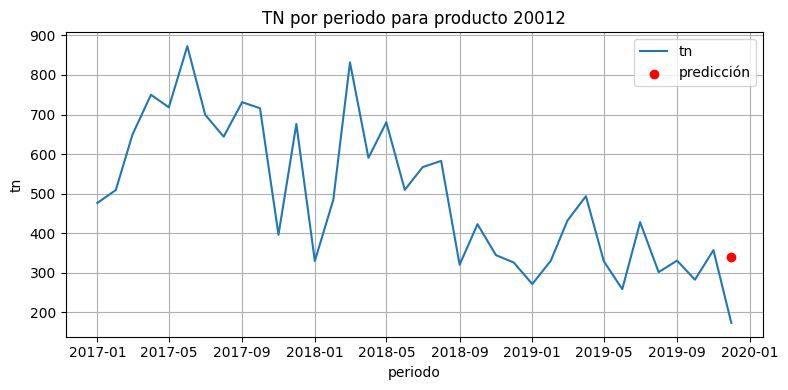

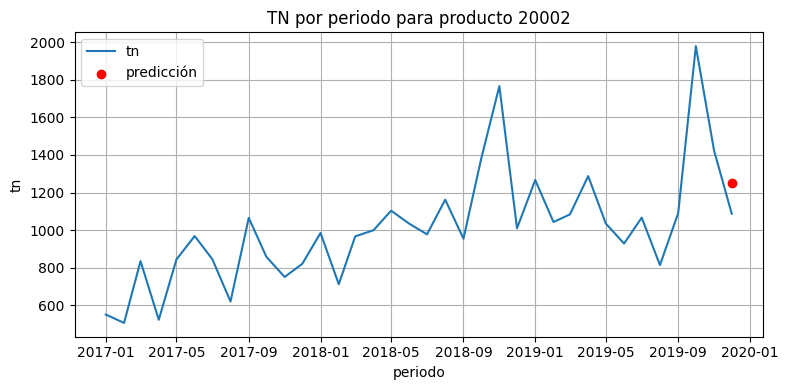

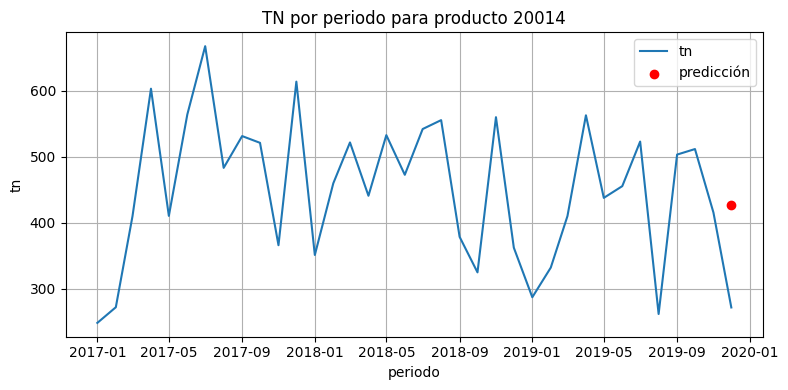

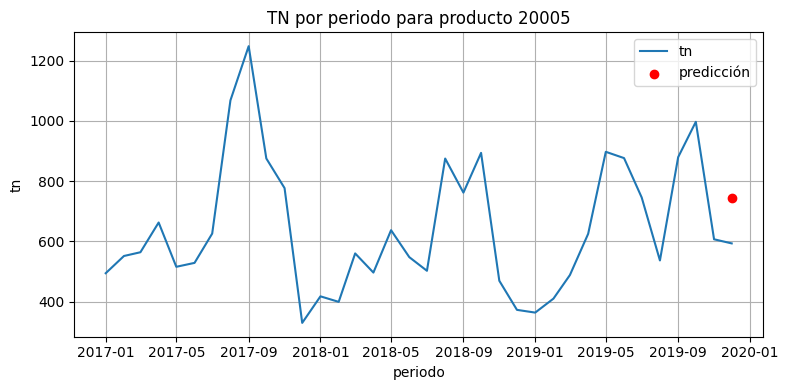

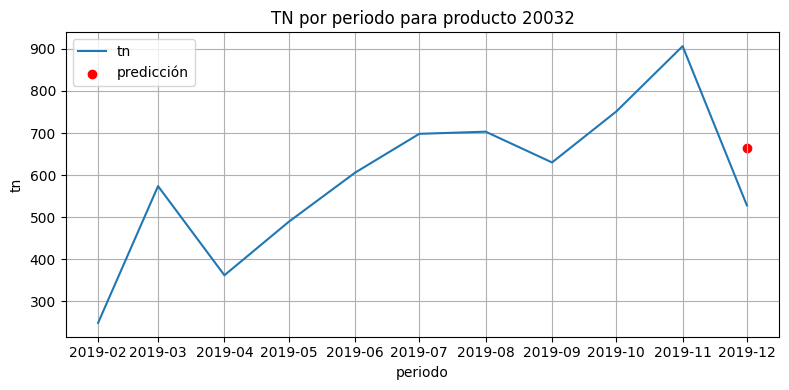

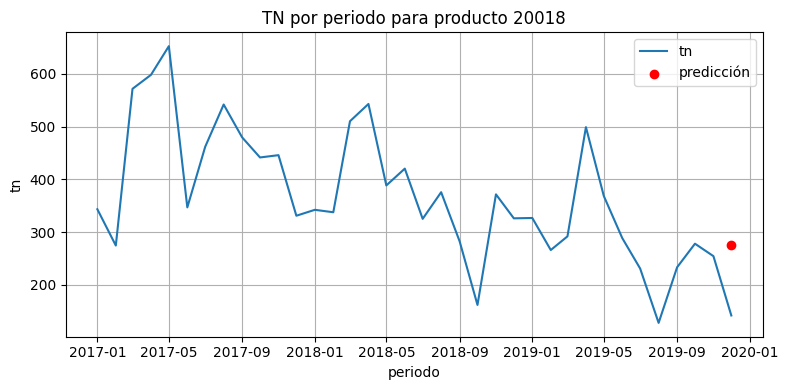

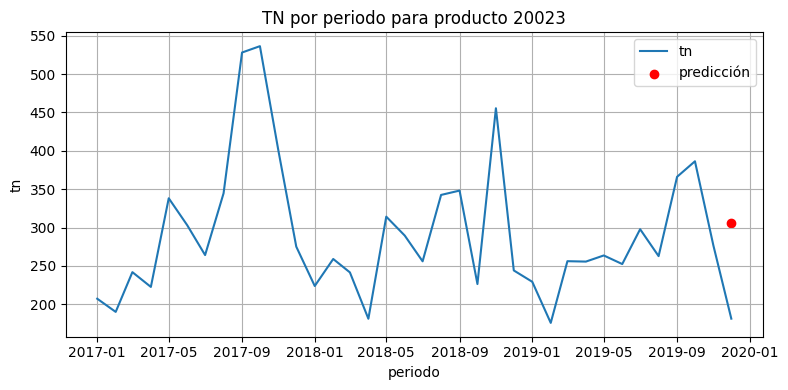

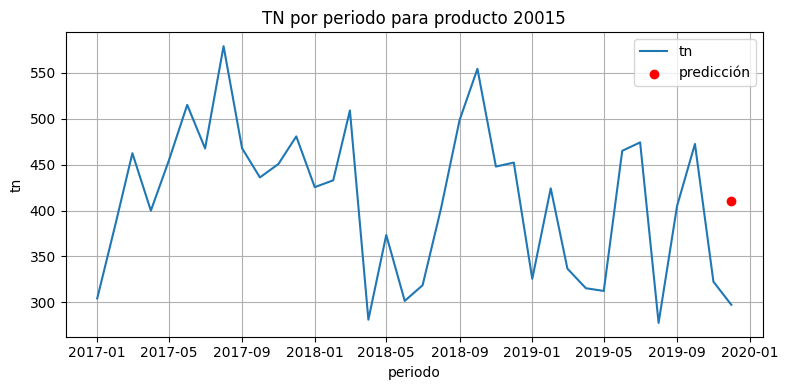

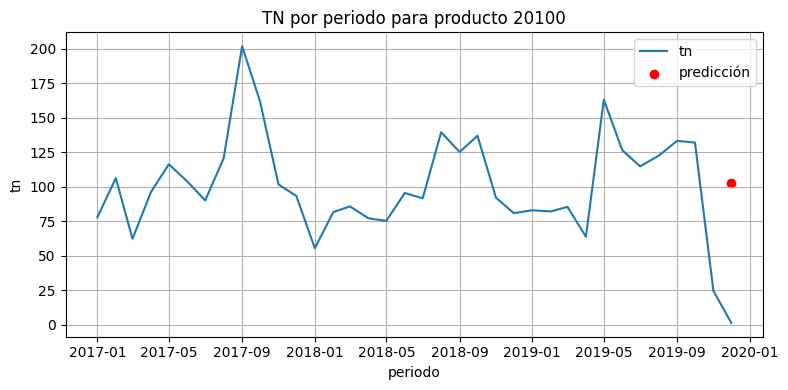

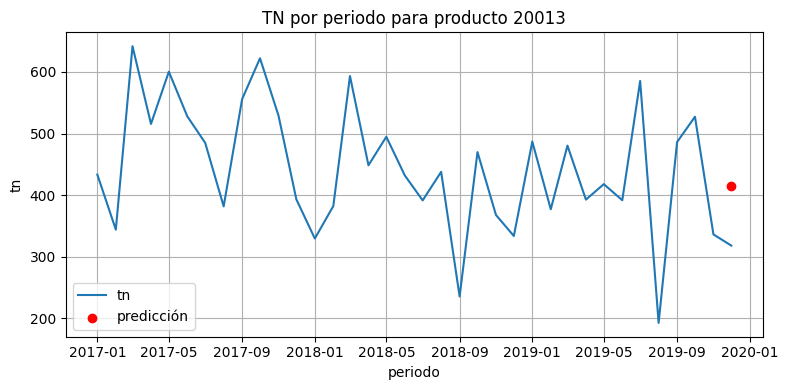

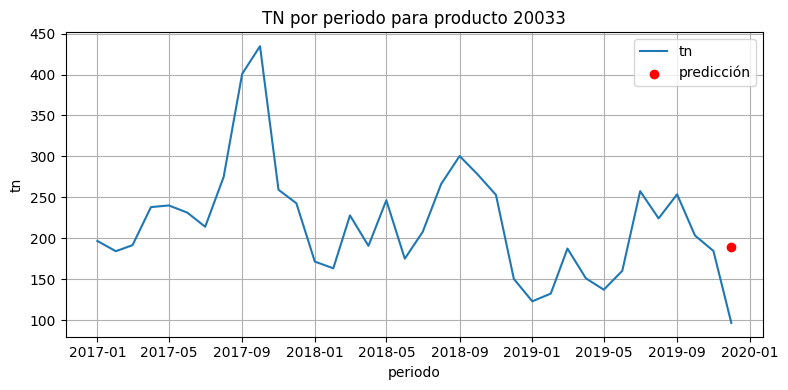

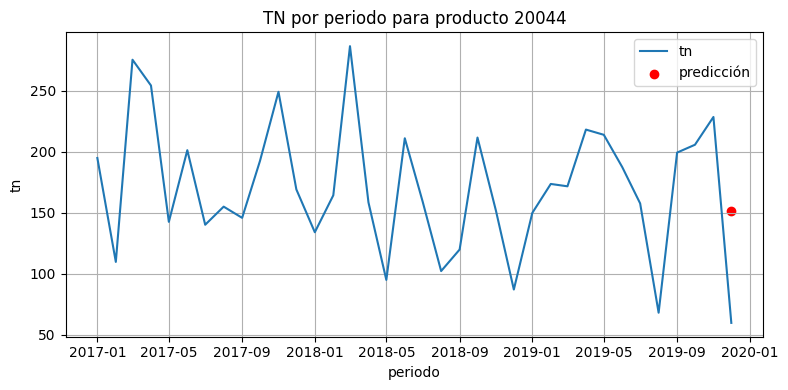

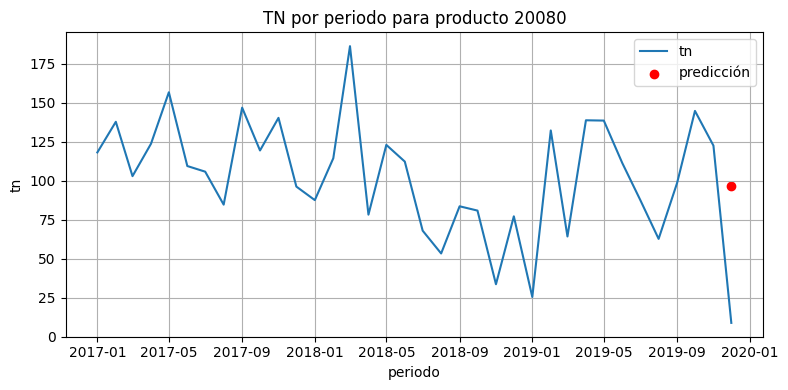

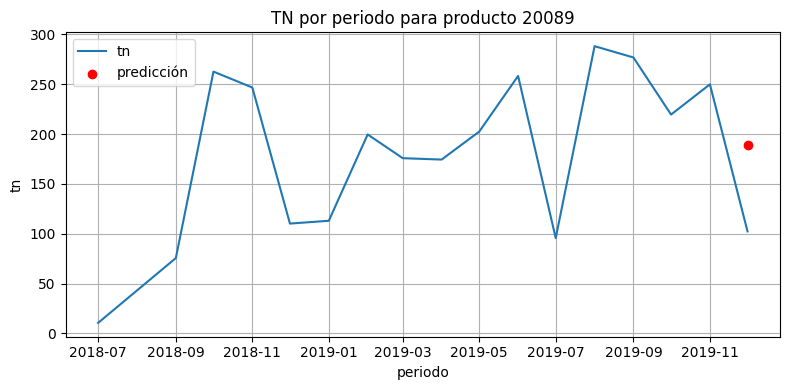

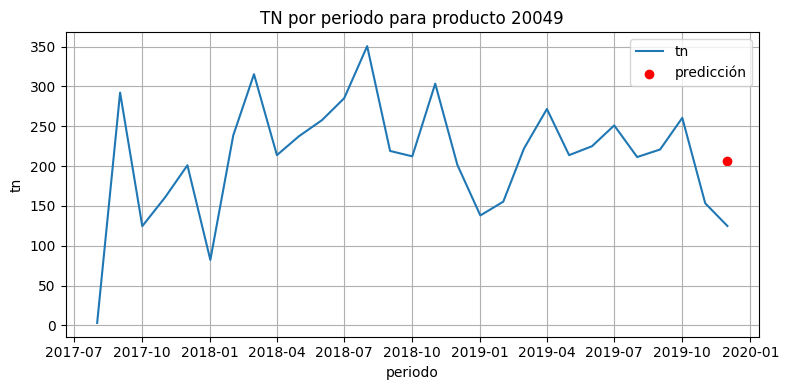

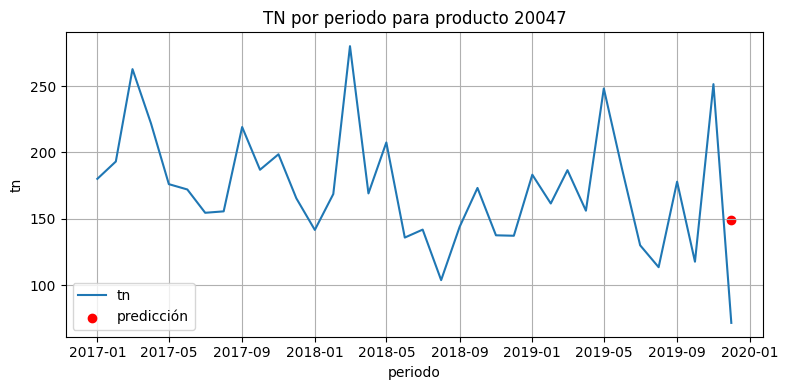

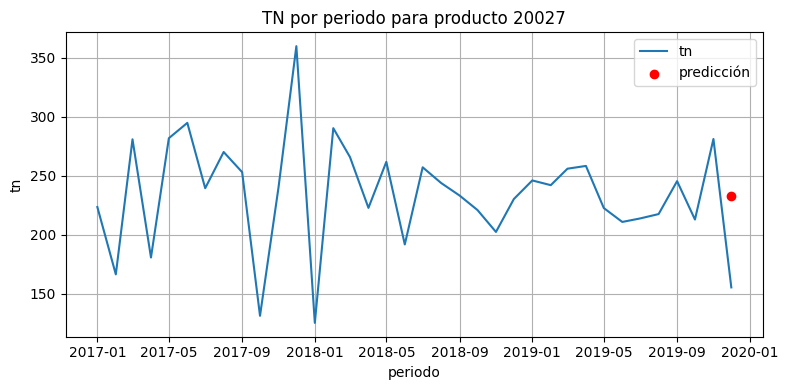

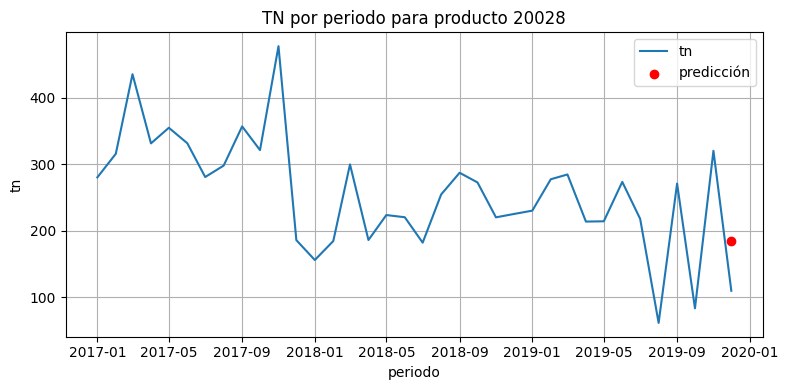

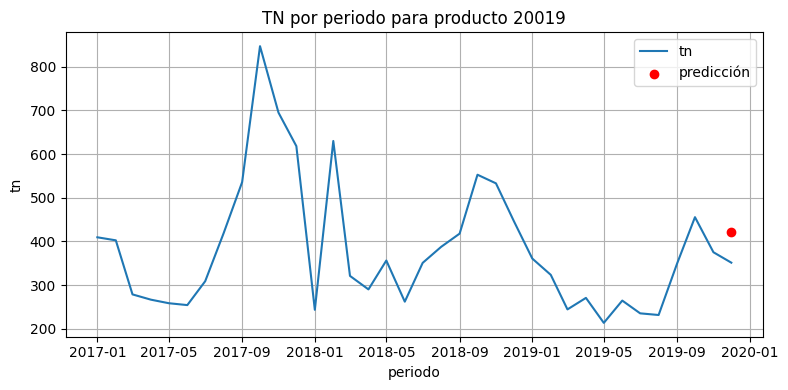

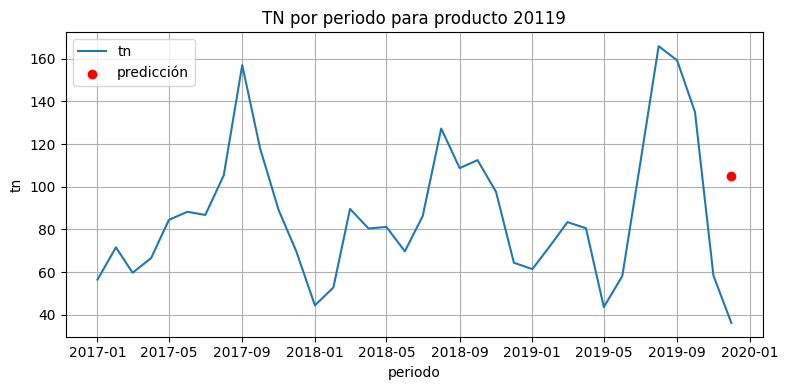

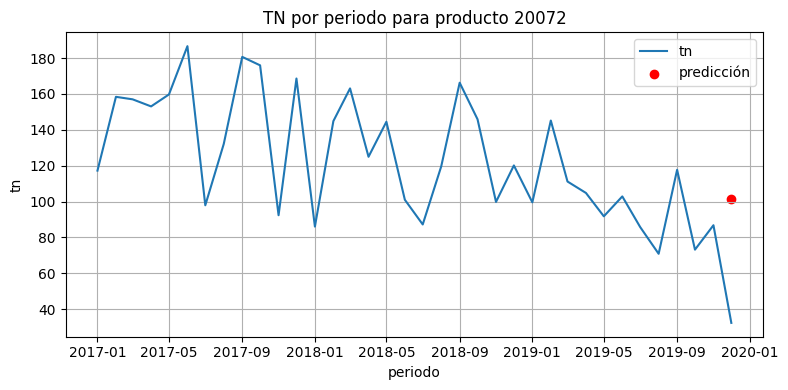

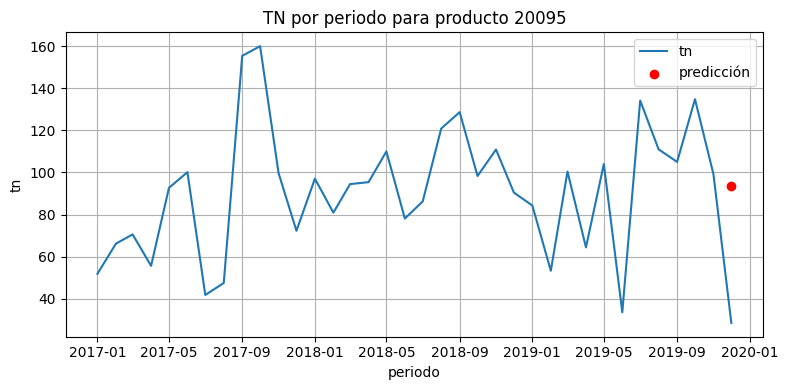

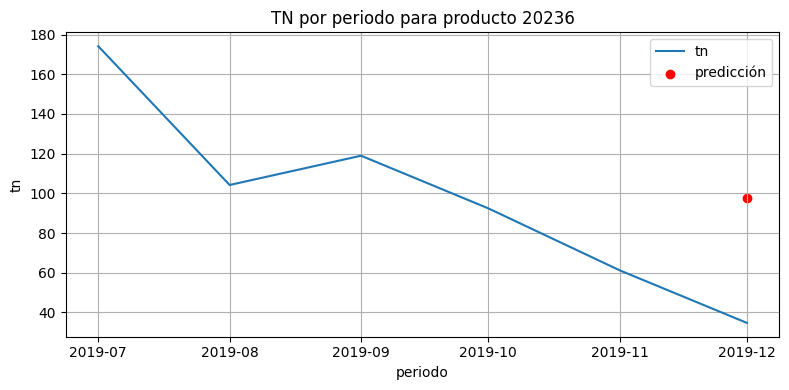

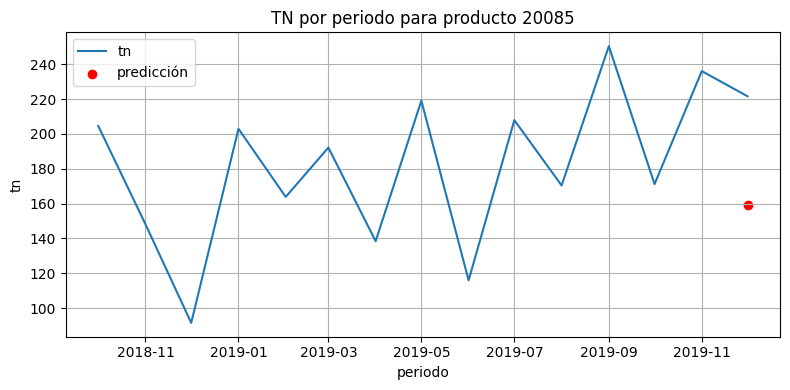

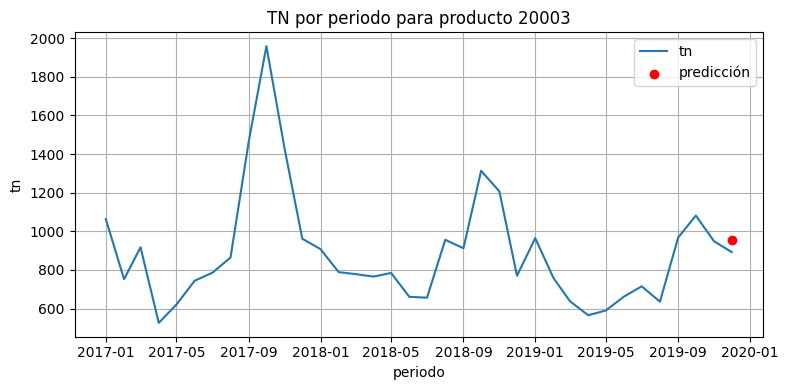

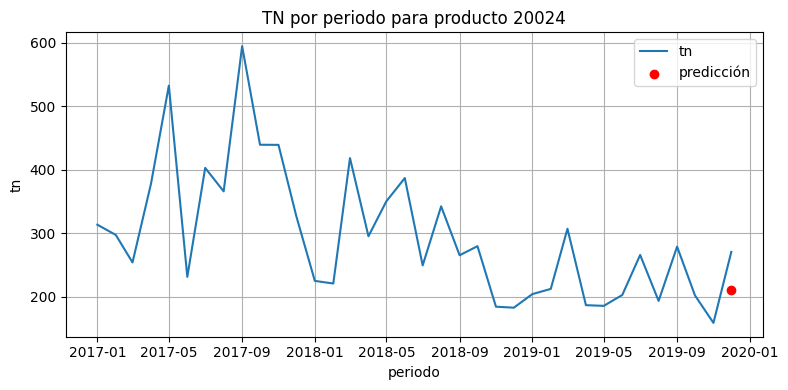

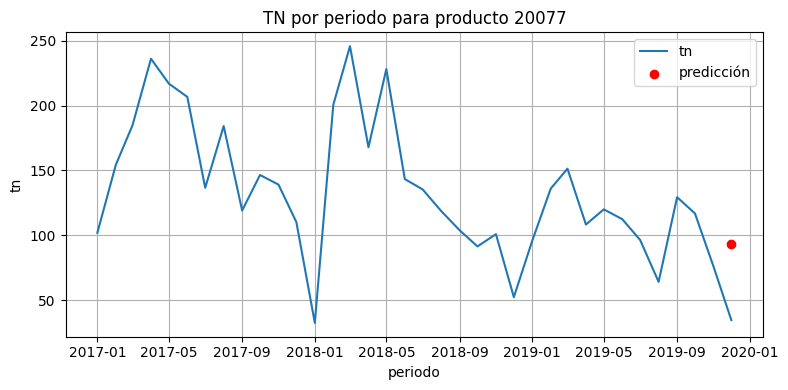

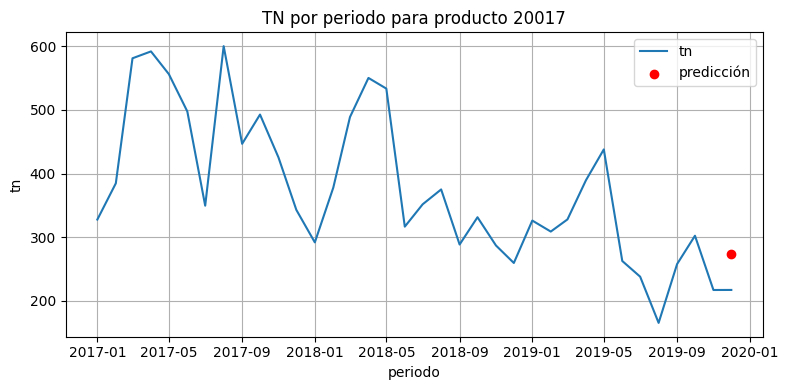

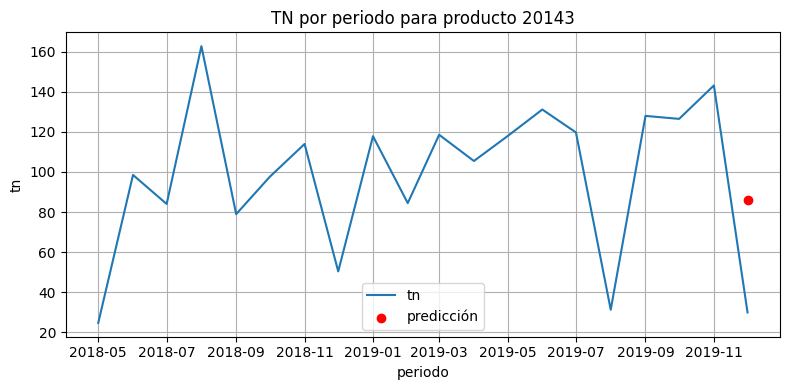

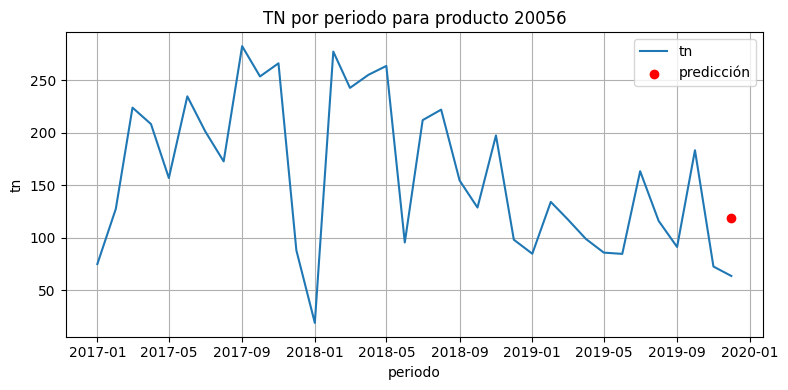

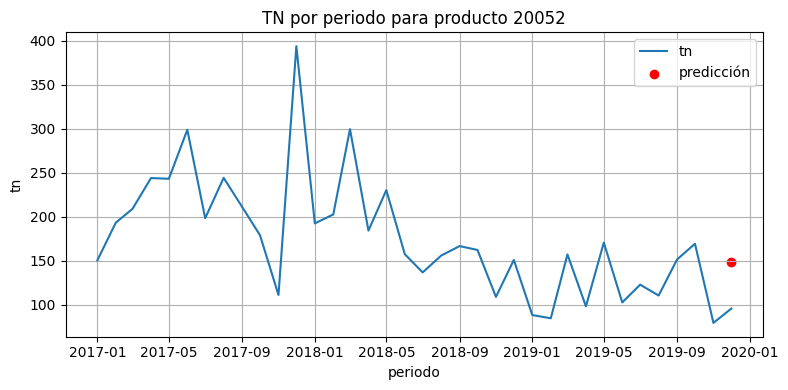

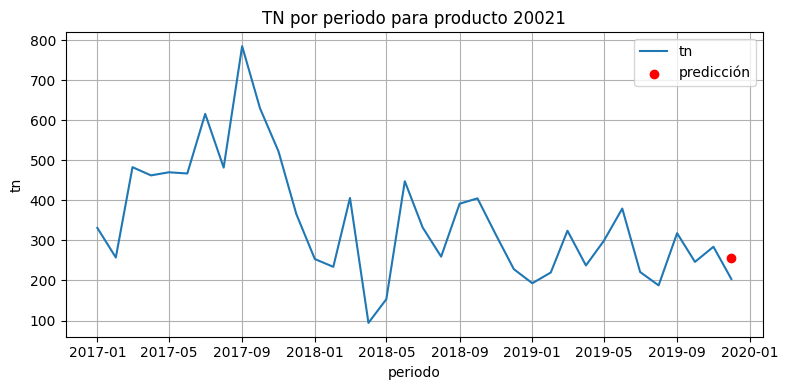

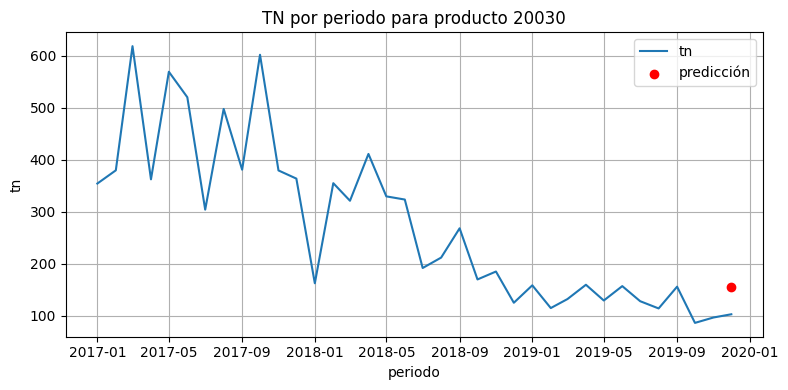

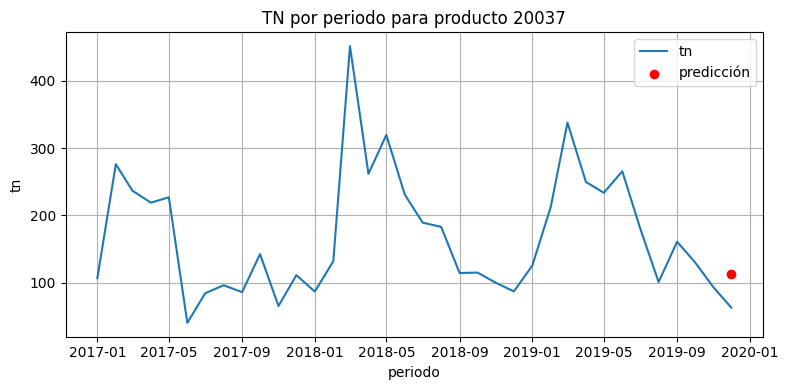

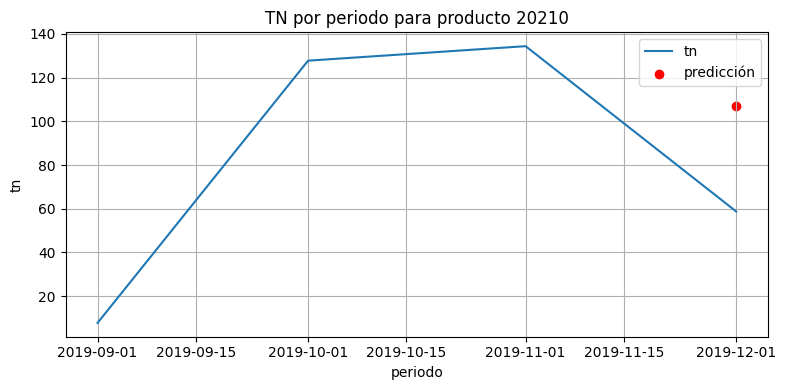

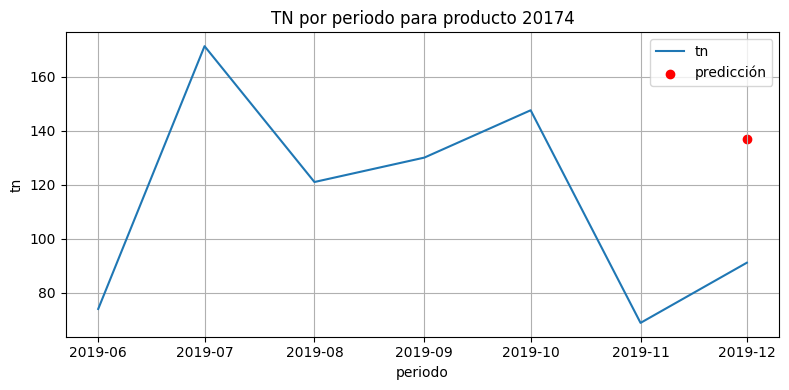

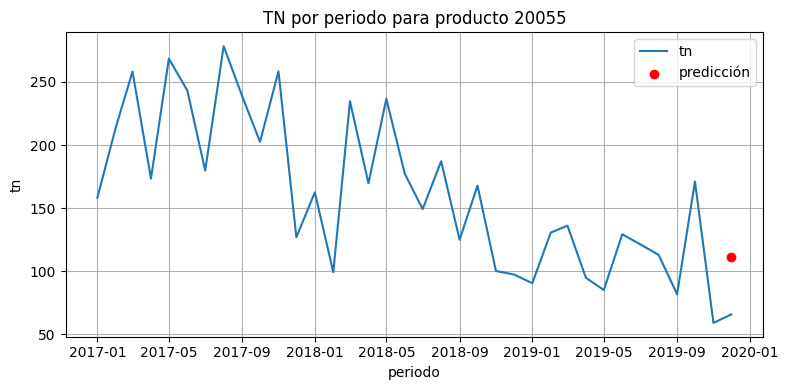

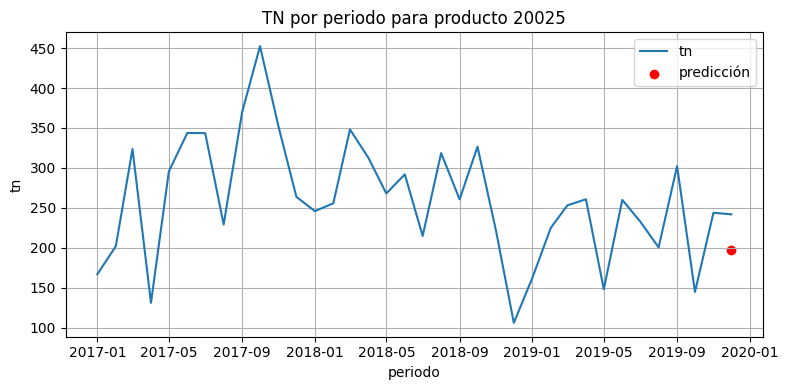

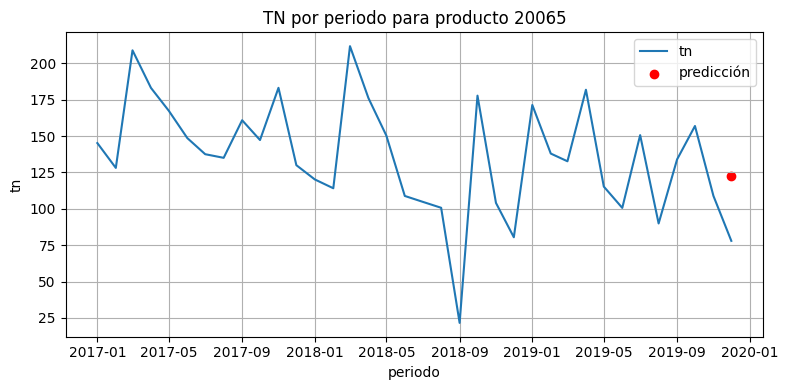

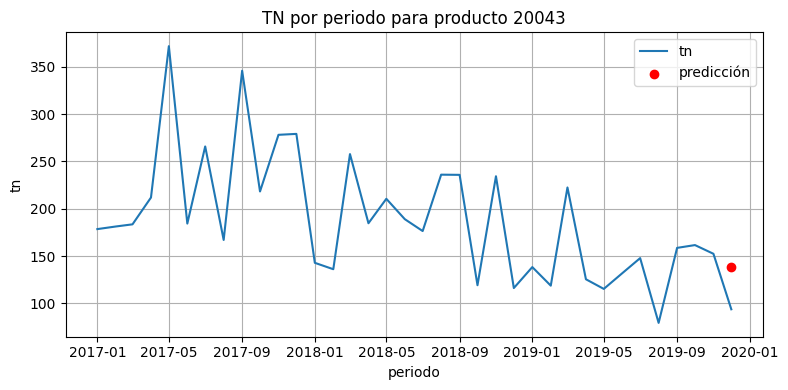

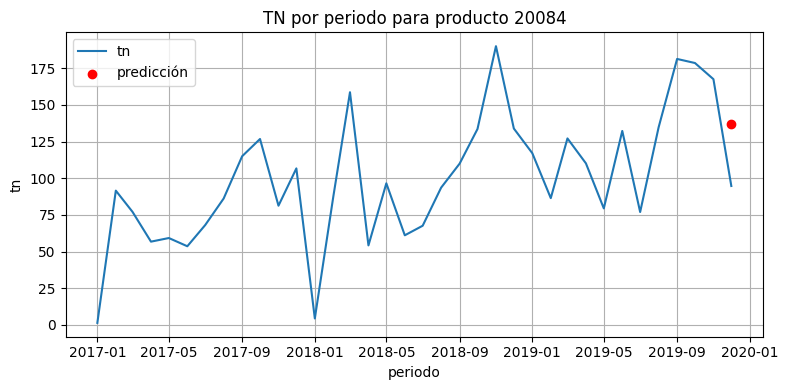

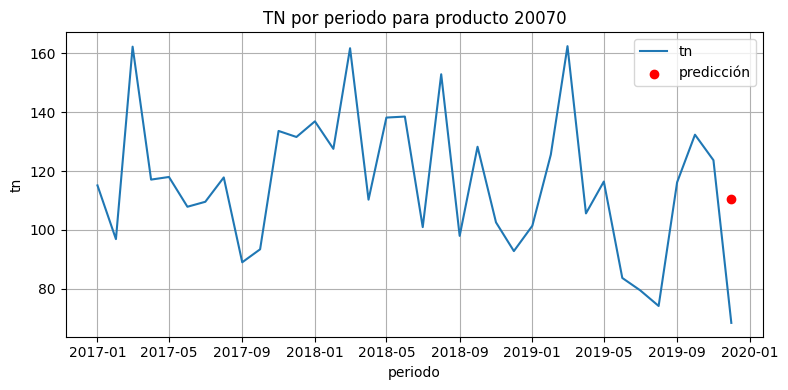

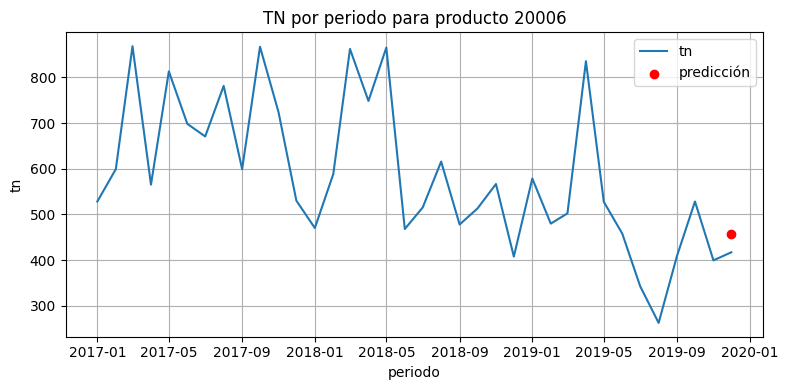

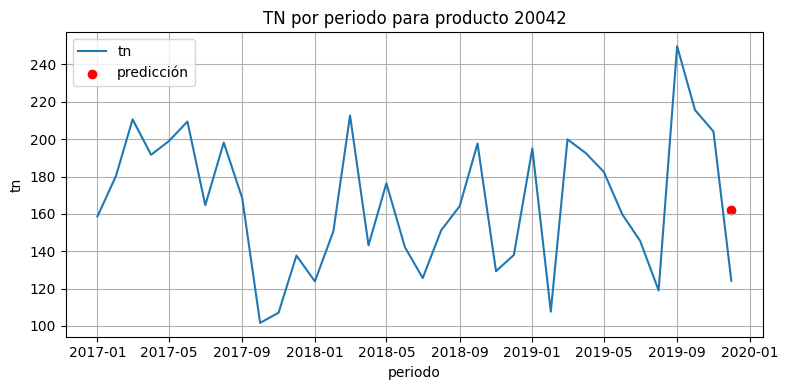

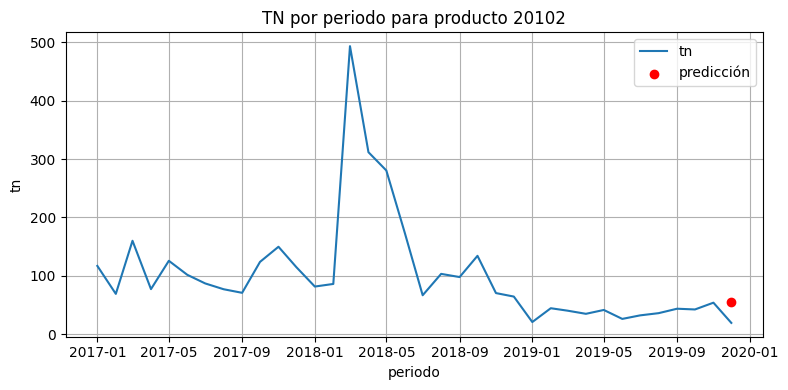

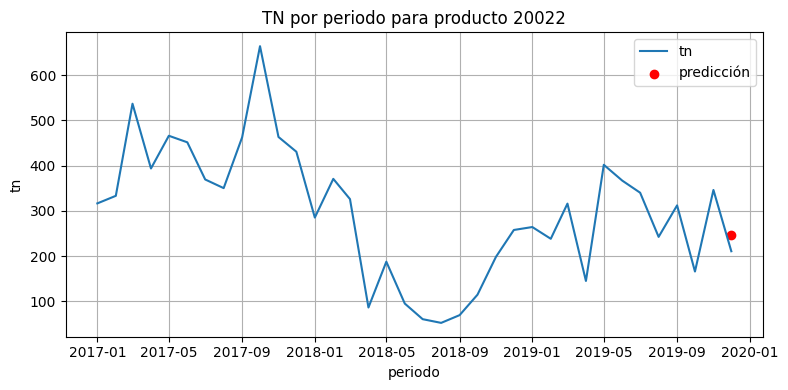

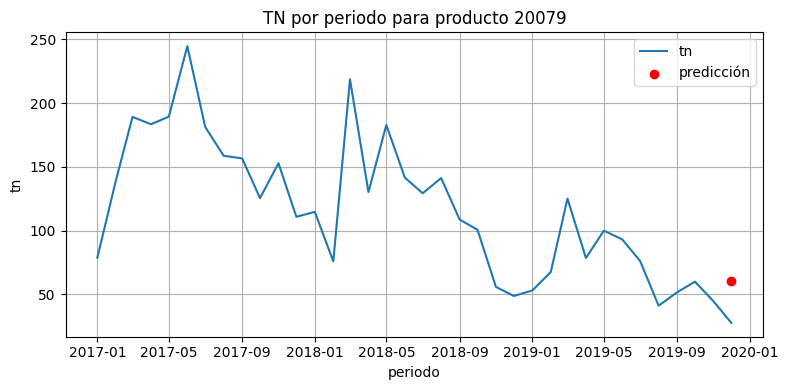

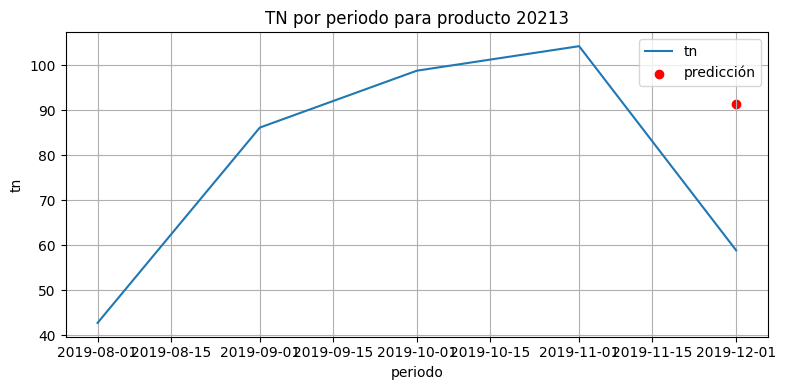

In [161]:
# Cargar los datos necesarios
#df_ventas = pd.read_csv("comparacion_diciembre.csv")
df_pred_80 = pd.read_csv("productos_80_error.csv")
df_sellin = pd.read_csv("sell-in.txt", sep="\t")
df_sellin["periodo"] = pd.to_datetime(df_sellin["periodo"], format="%Y%m")

# Lista de productos con mayor error
productos_top_error = df_pred_80["product_id"].unique()

# Graficar los primeros 50 como muestra
for product_id in productos_top_error[:50]:
    df_producto = df_sellin[df_sellin["product_id"] == product_id]
    serie = df_producto.groupby("periodo")["tn"].sum().sort_index()

    # Obtener predicción
    pred_row = df_ventas[df_ventas["product_id"] == product_id]
    pred = pred_row["tn"].values[0] if not pred_row.empty else None

    # Crear gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(serie.index, serie.values, label="tn")
    if pred is not None:
        plt.scatter(pd.to_datetime("2019-12-01"), pred, color='red', label="predicción")
    plt.title(f"TN por periodo para producto {product_id}")
    plt.xlabel("periodo")
    plt.ylabel("tn")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
